Problem Sketch: Mass Transport Model with Monte Carlo Simulation

The provided Python code addresses a fundamental problem in mass transport modeling, employing Monte Carlo techniques. The system under consideration is a one-dimensional lattice, with mass distributed randomly across various lattice sites. The simulation captures intricate phenomena like fragmentation, diffusion, adsorption, and aggregation, common in non-equilibrium scenarios.

Key Parameters:

    ro: A parameter influencing the distribution of mass.
    flux: Reflecting the flux of mass within the system.
    p_a: Probability parameter for mass movement.
    L: Length of the lattice.
    m: An array representing mass distribution across lattice sites.

Simulation Process:

    Initialization: Mass distribution across lattice sites is initialized based on a random process influenced by parameters ro and flux.

    Kinetic Events: Mass transport is modeled through kinetic events such as chipping, influenced by the probability p_a. Additionally, there's a probability probleft governing leftward movement during chipping.

    Monte Carlo Simulation: The simulation runs for a specified number of Monte Carlo steps (mcs) for different values of k (unit mass). Chipping events and mass redistributions occur stochastically.

    Histogram Analysis: At each step, a histogram is calculated to visualize the frequency distribution of mass across intervals. This aids in understanding the evolving system dynamics.

Visualization:
The final step involves visualizing the results through a histogram plot. The x-axis represents intervals, and the y-axis represents the frequency of mass distribution.

This modeling approach provides insights into mass transport phenomena in diverse fields, from growing interfaces to traffic flows. The Mean Field (MF) approximation is also explored, demonstrating its accuracy in describing the one-dimensional mass transport scenario.

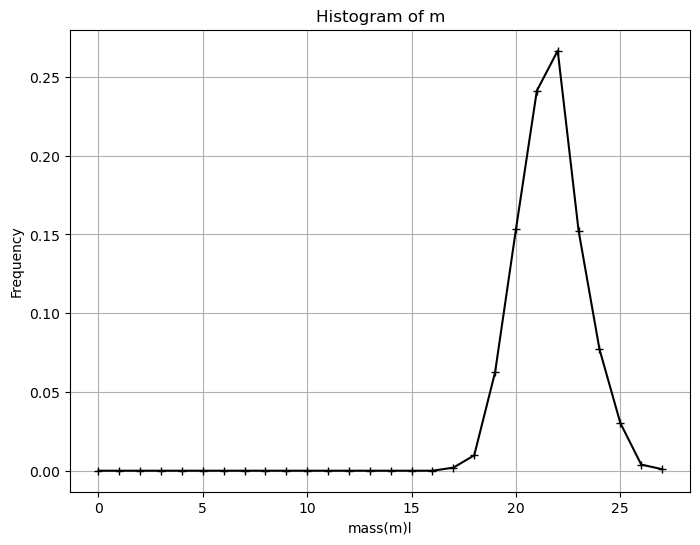

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
ro = 10
flux = 0.6
p_a = flux / (1 + flux)
L = 1024  # Length of lattice
m = np.zeros(L)
r = np.zeros(L)
probleft = 0.5
p = np.zeros(L)

# Initialize matrix with values
t = 0
u = 0
for i in range(L):
    u = np.random.normal(50, 1)
    m[i] = round((ro + 1) * L * u)
    t += u

for i in range(L):
    m[i] /= t

k_values = [1, 2, 3]
mcs = 1000

for k in k_values:
    for _ in range(mcs):
        for j in range(L):
            y = np.random.randint(0, L)
            yleft = (y - 1) % L
            yright = (y + 1) % L

            if np.random.rand() < p_a:
                m[y] += k

            if np.random.rand() < probleft and m[y] > k:
                m[y] -= k
                m[yleft] += k
            else:
                m[y] -= k
                m[yright] += k

        m = np.round(m)

# Calculate histogram and plot
num_intervals = 10
interval_width = (np.max(m) - np.min(m)) / num_intervals
d = np.arange(0, np.max(m) + interval_width, interval_width)
n_count, _ = np.histogram(m, d)
freq = n_count / len(m)

plt.figure(figsize=(8, 6))
plt.plot(freq, 'k+-')
plt.xlabel("mass(m)l")
plt.ylabel("Frequency")
plt.title("Histogram of m")
plt.grid(True)
plt.show()


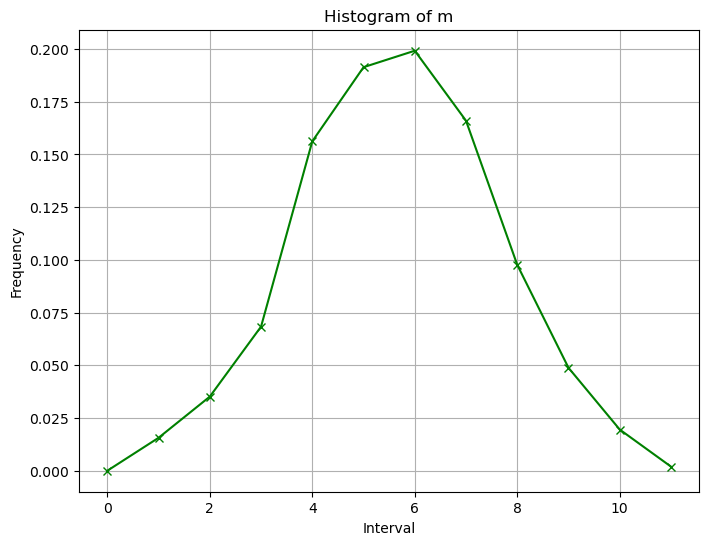

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
ro = 5
flux = 0.6
p_a = flux / (1 + flux)
L = 512  # Length of lattice
m = np.zeros(L)
r = np.zeros(L)
probleft = 0.5

# Initialize matrix with values
t = 0
u = 0
for i in range(L):
    u = np.random.normal(50, 1)
    m[i] = round((ro + 1) * L * u)
    t += u

for i in range(L):
    m[i] /= t

mcs = 400

for x in range(mcs):
    for j in range(L):
        y = np.random.randint(0, L)
        yleft = (y - 1) % L
        yright = (y + 1) % L

        if np.random.rand() < p_a:
            m[y] += 1

        if m[y] >= 3:
            b = np.random.rand()
            if 0.1667 < b <= 0.5:
                if np.random.rand() < probleft:
                    m[y] -= 2
                    m[yleft] += 2
                else:
                    m[y] -= 2
                    m[yright] += 2
            elif b > 0.5:
                if np.random.rand() < probleft:
                    m[y] -= 1
                    m[yleft] += 1
                else:
                    m[y] -= 1
                    m[yright] += 1
            else:
                if np.random.rand() < probleft:
                    m[y] -= 3
                    m[yleft] += 3
                else:
                    m[y] -= 3
                    m[yright] += 3

    m = np.round(m)

# Calculate histogram and plot
num_intervals = 10
interval_width = (np.max(m) - np.min(m)) / num_intervals
d = np.arange(0, np.max(m) + interval_width, interval_width)
n_count, _ = np.histogram(m, d)
freq = n_count / len(m)

plt.figure(figsize=(8, 6))
plt.plot(freq, 'gx-')
plt.xlabel("Interval")
plt.ylabel("Frequency")
plt.title("Histogram of m")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Target distribution (unnormalized)
def target_distribution(x):
    return np.exp(-x**2 / 2.0)  # Gaussian distribution

# Proposal distribution (symmetric, e.g., a Gaussian)
def proposal_distribution(x, step_size):
    return np.random.normal(x, step_size)

# Metropolis-Hastings algorithm
def metropolis_hastings(iterations, step_size):
    samples = []
    current_sample = np.random.randn()  # Initial sample from a standard normal distribution

    for _ in range(iterations):
        # Propose a new sample
        proposed_sample = proposal_distribution(current_sample, step_size)

        # Calculate acceptance ratio
        acceptance_ratio = target_distribution(proposed_sample) / target_distribution(current_sample)

        # Accept or reject the proposed sample
        if np.random.uniform(0, 1) < acceptance_ratio:
            current_sample = proposed_sample

        samples.append(current_sample)

    return np.array(samples)

# Number of iterations and step size
iterations = 10000
step_size = 0.5

# Run Metropolis-Hastings
samples = metropolis_hastings(iterations, step_size)

# Plot the samples and compare to the target distribution
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, alpha=0.5, label='Samples (MCMC)')
x = np.linspace(-5, 5, 100)
plt.plot(x, target_distribution(x), 'r-', linewidth=2, label='Target Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.title('Metropolis-Hastings Sampling')
plt.grid(True)
plt.show()


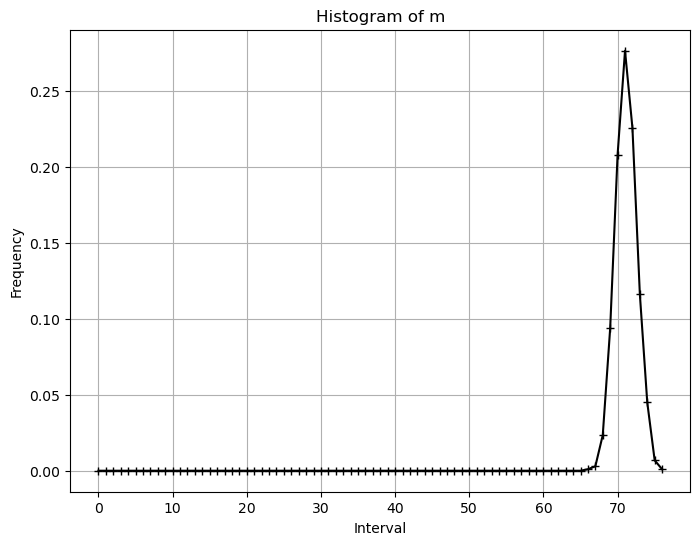

In [6]:
#new
import numpy as np
import matplotlib.pyplot as plt

ro = 10
flux = 0.6
p_a = flux / (1 + flux)
L = 1024  # Length of lattice
m = np.zeros(L)
probleft = 0.5

# Initialize matrix with values
t = 0
u = 0
for i in range(L):
    u = np.random.normal(50, 1)
    m[i] = round((ro + 1) * L * u)
    t += u

for i in range(L):
    m[i] /= t

k_values = [1, 2, 3]
mcs = 10000

for x in range(mcs):
    for j in range(L):
        y = np.random.randint(1, L+1)
        yleft = y - 1 if y > 1 else L
        yright = y + 1 if y < L else 1

        if np.random.rand() < p_a:
            m[y-1] += np.random.choice(k_values)

        if np.random.rand() < probleft and m[y-1] > 1:
            m[y-1] -= 1
            m[yleft-1] += 1
        else:
            m[y-1] -= 1
            m[yright-1] += 1

    m = np.round(m)

# Calculate histogram and plot
num_intervals = 10
interval_width = (np.max(m) - np.min(m)) / num_intervals
d = np.arange(0, np.max(m) + interval_width, interval_width)
n_count, _ = np.histogram(m, d)
freq = n_count / len(m)

plt.figure(figsize=(8, 6))
plt.plot(freq, 'k+-')
plt.xlabel("Interval")
plt.ylabel("Frequency")
plt.title("Histogram of m")
plt.grid(True)
plt.show()


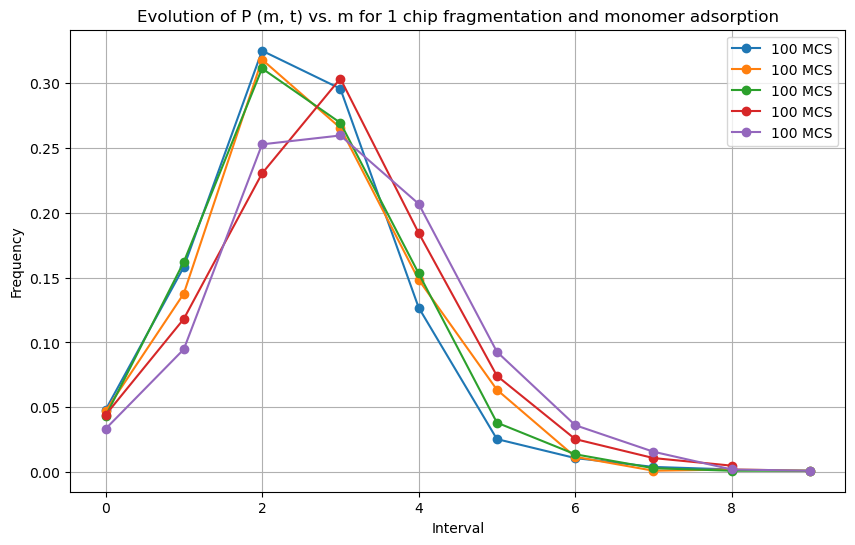

In [11]:
#nrew

import numpy as np
import matplotlib.pyplot as plt

# Parameters
ro = 10
flux = 0.6
p_a = flux / (1 + flux)
L = 1024  # Length of lattice
m = np.zeros(L)
r = np.zeros(L)
probleft = 0.5
p = np.zeros(L)

# Initialize matrix with values
t = 0
u = 0
for i in range(L):
    u = np.random.normal(50, 1)
    m[i] = round((ro + 1) * L * u)
    t += u

for i in range(L):
    m[i] /= t

k_values = [1, 2, 3]

#mcs_values = [100, 200, 300, 400] #this takes long time 

mcs_values = [100]
# Data collection for 25 independent runs
num_runs = 5 #increase number of run for better accuracy

plt.figure(figsize=(10, 6))

for run in range(num_runs):
    for mcs in mcs_values:
        m = np.zeros(L)

        for x in range(mcs):
            for j in range(L):
                y = np.random.randint(1, L + 1)
                yleft = y - 1 if y > 1 else L
                yright = y + 1 if y < L else 1

                if np.random.rand() < p_a:
                    m[y - 1] += np.random.choice(k_values)

                if np.random.rand() < probleft and m[y - 1] >= np.min(k_values):
                    m[y - 1] -= np.random.choice(k_values)
                    m[yleft - 1] += np.random.choice(k_values)
                else:
                    m[y - 1] -= np.random.choice(k_values)
                    m[yright - 1] += np.random.choice(k_values)

            m = np.round(m)

        # Calculate histogram and plot
        num_intervals = 10
        interval_width = (np.max(m) - np.min(m)) / num_intervals
        d = np.arange(0, np.max(m) + interval_width, interval_width)
        n_count, _ = np.histogram(m, d)
        freq = n_count / len(m)

        # Plotting
        plt.plot(freq, 'o-', label=f'{mcs} MCS')

plt.xlabel("Interval")
plt.ylabel("Frequency")
plt.title("Evolution of P (m, t) vs. m for 1 chip fragmentation and monomer adsorption")
plt.legend()
plt.grid(True)
plt.show()


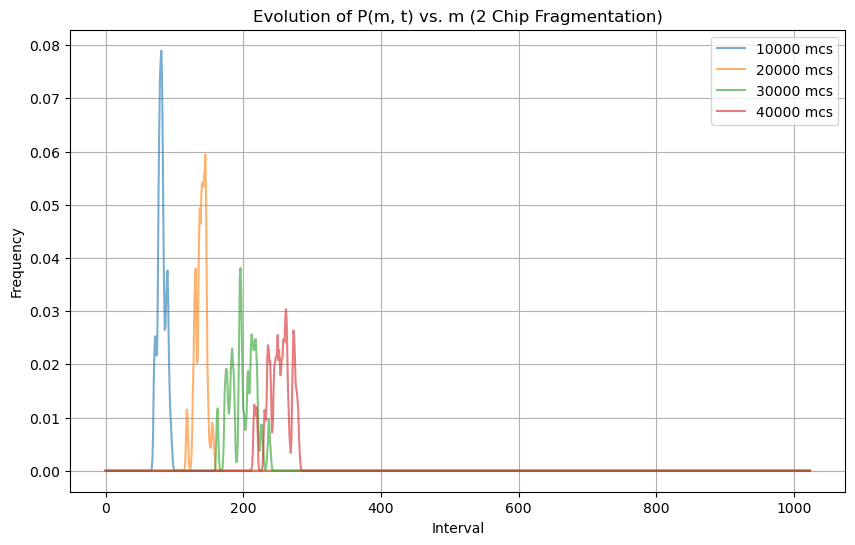

In [20]:
#two chip
import numpy as np
import matplotlib.pyplot as plt

# Parameters
ro = 1
flux = 0.6
p_a = flux / (1 + flux)
L = 1024  # Length of lattice
mcs_values = [10000, 20000, 30000, 40000]  # Different values of Monte Carlo steps
w1 = 1
q = 0.6

# Data collection for 25 independent runs
num_runs = 25

# Preallocate memory for efficiency
all_freqs = np.zeros((len(mcs_values), num_runs, L))

for run in range(num_runs):
    m = np.zeros(L)

    for mcs_idx, mcs in enumerate(mcs_values):
        for _ in range(mcs):
            y = np.random.randint(0, L, size=L)
            yleft = (y - 1) % L
            yright = (y + 1) % L

            chip_condition = np.random.rand(L) < p_a
            m += np.where(chip_condition, 2, 0)

            left_condition = np.logical_and(chip_condition, m > 2) & (np.random.rand(L) < p_a)
            right_condition = np.logical_and(chip_condition, m > 2) & ~left_condition

            m -= 2 * left_condition
            m[yleft] += 2 * left_condition
            m -= 2 * right_condition
            m[yright] += 2 * right_condition

        # Calculate histogram
        num_intervals = min(10, L)
        interval_width = (np.max(m) - np.min(m)) / num_intervals
        d = np.arange(0, np.max(m) + interval_width, interval_width)
        n_count, _ = np.histogram(m, d)
        freq = n_count / len(m)

        # Ensure freq has the correct size
        freq = np.concatenate([freq, np.zeros(L - len(freq))])

        all_freqs[mcs_idx, run, :] = freq

# Plotting
plt.figure(figsize=(10, 6))

# Plot each mcs value with a different color
for mcs_idx, mcs in enumerate(mcs_values):
    avg_freq = np.mean(all_freqs[mcs_idx, :, :], axis=0)
    plt.plot(avg_freq, alpha=0.6, label=f'{mcs} mcs')

# Additional plot settings
plt.xlabel("Interval")
plt.ylabel("Frequency")
plt.title("Evolution of P(m, t) vs. m (2 Chip Fragmentation)")
plt.legend()
plt.grid(True)
plt.show()


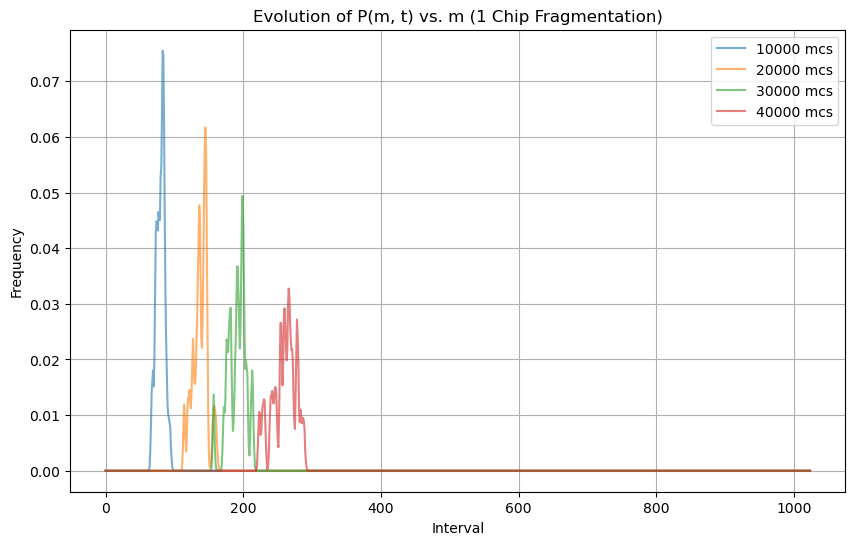

In [26]:
#one chip + absorpition
import numpy as np
import matplotlib.pyplot as plt

# Parameters
ro = 10
flux = 0.6
p_a = flux / (1 + flux)
L = 1024  # Length of lattice
mcs_values = [10000, 20000, 30000, 40000]  # Different values of Monte Carlo steps
probleft = 0.5

# Data collection for 25 independent runs
num_runs = 25

# Preallocate memory for efficiency
all_freqs = np.zeros((len(mcs_values), num_runs, L))

for run in range(num_runs):
    m = np.zeros(L)

    for mcs_idx, mcs in enumerate(mcs_values):
        for _ in range(mcs):
            y = np.random.randint(0, L, size=L)
            yleft = (y - 1) % L
            yright = (y + 1) % L

            chip_condition = np.random.rand(L) < p_a
            m += np.where(chip_condition, 1, 0)

            left_condition = np.logical_and(chip_condition, m > 1) & (np.random.rand(L) < probleft)
            right_condition = np.logical_and(chip_condition, m > 1) & ~left_condition

            m -= left_condition
            m[yleft] += left_condition
            m -= right_condition
            m[yright] += right_condition

        # Calculate histogram
        #num_intervals = min(10, L)  # Ensure num_intervals doesn't exceed the length of the lattice
        num_intervals = 10
        interval_width = (np.max(m) - np.min(m)) / num_intervals
        d = np.arange(0, np.max(m) + interval_width, interval_width)
        n_count, _ = np.histogram(m, d)
        freq = n_count / len(m)

        all_freqs[mcs_idx, run, :len(freq)] = freq  # Adjust size to match the length of freq

# Plotting
plt.figure(figsize=(10, 6))

# Plot each mcs value with a different color
for mcs_idx, mcs in enumerate(mcs_values):
    avg_freq = np.mean(all_freqs[mcs_idx, :, :], axis=0)
    plt.plot(avg_freq, alpha=0.6, label=f'{mcs} mcs')

# Additional plot settings
plt.xlabel("Interval")
plt.ylabel("Frequency")
plt.title("Evolution of P(m, t) vs. m (1 Chip Fragmentation)")
plt.legend()
plt.grid(True)
plt.show()


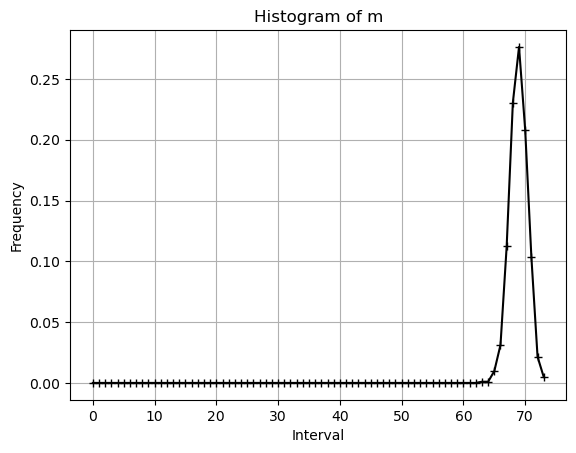

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
ro = 10
flux = 0.6
p_a = flux / (1 + flux)
L = 1024  # Length of lattice
mcs = 10000

# Initialize matrix with values
m = np.zeros(L)

# Initialize matrix with values
t = 0
for i in range(L):
    u = np.random.normal(50, 1)
    m[i] = round((ro + 1) * L * u)
    t += u

m /= t

# Simulation
for x in range(mcs):
    for j in range(L):
        y = np.random.randint(0, L)
        yleft = (y - 1) % L
        yright = (y + 1) % L

        if np.random.rand() < p_a:
            m[y] += np.random.choice([1, 2, 3])  # Select randomly from [1, 2, 3]

        if np.random.rand() < probleft and m[y] > 1:
            m[y] -= 1
            m[yleft] += 1
        else:
            m[y] -= 1
            m[yright] += 1

    m = np.round(m)

# Calculate histogram and plot
num_intervals = 10
interval_width = (np.max(m) - np.min(m)) / num_intervals
d = np.arange(0, np.max(m) + interval_width, interval_width)
n_count, _ = np.histogram(m, d)
freq = n_count / len(m)

plt.figure()
plt.plot(freq, 'k+-')
plt.xlabel("Interval")
plt.ylabel("Frequency")
plt.title("Histogram of m")
plt.grid(True)
plt.show()


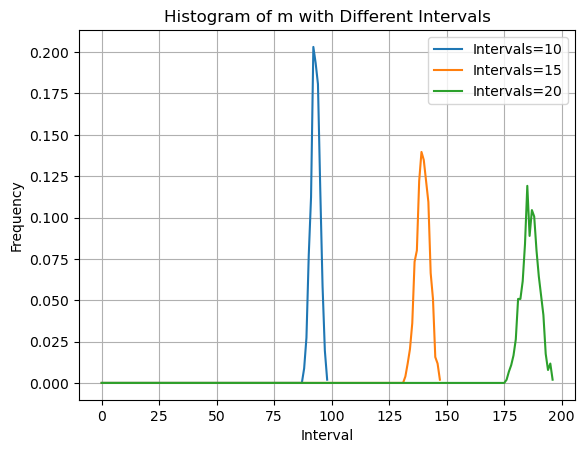

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
ro = 10
flux = 0.6
p_a = flux / (1 + flux)
L = 1024  # Length of lattice
mcs = 10000

# Initialize matrix with values
m = np.zeros(L)

# Initialize matrix with values
t = 0
for i in range(L):
    u = np.random.normal(50, 1)
    m[i] = round((ro + 1) * L * u)
    t += u

m /= t

# Simulation
for x in range(mcs):
    for j in range(L):
        y = np.random.randint(0, L)
        yleft = (y - 1) % L
        yright = (y + 1) % L

        if np.random.rand() < p_a:
            m[y] += np.random.choice([1, 2, 3])  # Select randomly from [1, 2, 3]

        if np.random.rand() < probleft and m[y] > 1:
            m[y] -= 1
            m[yleft] += 1
        else:
            m[y] -= 1
            m[yright] += 1

    m = np.round(m)

# Different numbers of intervals
num_intervals_list = [10, 15, 20]

plt.figure()

for num_intervals in num_intervals_list:
    # Calculate histogram and plot
    interval_width = (np.max(m) - np.min(m)) / num_intervals
    d = np.arange(0, np.max(m) + interval_width, interval_width)
    n_count, _ = np.histogram(m, d)
    freq = n_count / len(m)

    plt.plot(freq, label=f'Intervals={num_intervals}')

plt.xlabel("Interval")
plt.ylabel("Frequency")
plt.title("Histogram of m with Different Intervals")
plt.legend()
plt.grid(True)
plt.show()


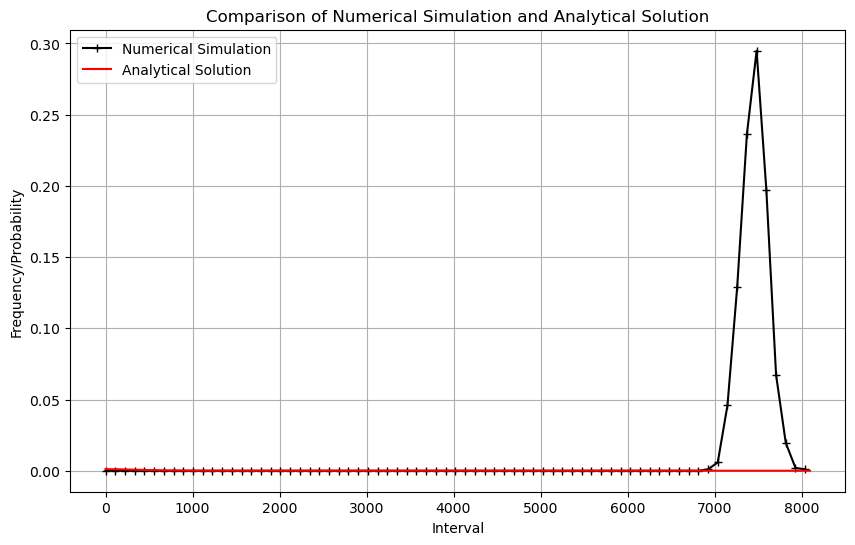

In [30]:
#pltoing with diffucsion equation import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the numerical simulation
ro = 10
flux = 0.6
p_a = flux / (1 + flux)
L = 1024
mcs = 10000

# Initialize matrix with values
m = np.zeros(L)

# Initialize matrix with values
t = 0
for i in range(L):
    u = np.random.normal(50, 1)
    m[i] = round((ro + 1) * L * u)
    t += u

m /= t

# Simulation
for x in range(mcs):
    for j in range(L):
        y = np.random.randint(0, L)
        yleft = (y - 1) % L
        yright = (y + 1) % L

        if np.random.rand() < p_a:
            m[y] += np.random.choice([1, 2, 3])

        if np.random.rand() < probleft and m[y] > 1:
            m[y] -= 1
            m[yleft] += 1
        else:
            m[y] -= 1
            m[yright] += 1

    m = np.round(m)

# Calculate histogram
num_intervals = 10
interval_width = (np.max(m) - np.min(m)) / num_intervals
d = np.arange(0, np.max(m) + interval_width, interval_width)
n_count, _ = np.histogram(m, d)
freq = n_count / len(m)

# Parameters for the analytical solution
w1 = 1
q = 0.6

# Calculate analytical solution
m_analytical = np.arange(0, np.max(m) + 1)
prob_analytical = (
    1 / (np.sqrt(2 * np.pi * ((1 + w1) + q) * t))
) * np.exp(-((m_analytical - (q - 1) * (1 - w1) * t) ** 2) / (2 * ((1 + w1) + q) * t))

# Plotting
plt.figure(figsize=(10, 6))

# Plot the histogram
plt.plot(d[:-1], freq, 'k+-', label='Numerical Simulation')

# Plot the analytical solution
plt.plot(m_analytical, prob_analytical, 'r-', label='Analytical Solution')

plt.xlabel("Interval")
plt.ylabel("Frequency/Probability")
plt.title("Comparison of Numerical Simulation and Analytical Solution")
plt.legend()
plt.grid(True)
plt.show()
